## **Import the TensorFlow library**

This code contains the training for a CNN in which the model learns to recognize the digits. This is different from the other training script because the model learns the digits from 0 to 6. The Idea is to have the digits 7,8,9 for the OL learning to eb applied on the OpenMV camera.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout, Dense, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt 
import numpy as np
import random
import os
import csv 

Load MNIST dataset and split in training and test

In [2]:
(data_train, label_train),(data_test, label_test) = mnist.load_data() # Load data
print('The original dataset shapes are')
print(f'    Train dataset shape: {data_train.shape}')
print(f'    Test dataset shape:  {data_test.shape}')

The original dataset shapes are
    Train dataset shape: (60000, 28, 28)
    Test dataset shape:  (10000, 28, 28)


Split the train and test dataset in smaller datasets. Separation criterion is if the number is smaller than 6 or not.

In [3]:
train_samples = label_train.shape[0]
test_samples  = label_test.shape[0]

trainLow_samples  = np.sum(np.where(label_train < 6, 1, 0))
testLow_samples = np.sum(np.where(label_test <  6, 1, 0))

# separate in containers data that is lower nad higer than 6
data_low_train   = np.zeros([trainLow_samples,28,28])
label_low_train  = np.zeros(trainLow_samples)
data_high_train  = np.zeros([train_samples-trainLow_samples,28,28])
label_high_train = np.zeros(train_samples-trainLow_samples)

data_low_test   = np.zeros([testLow_samples,28,28])
label_low_test  = np.zeros(testLow_samples)
data_high_test  = np.zeros([test_samples-testLow_samples,28,28])
label_high_test = np.zeros(test_samples-testLow_samples)

j,k = 0,0
for i in range(0,train_samples):  
    if(label_train[i]<6):
        data_low_train[j,:,:] = data_train[i,:,:]
        label_low_train[j]    = label_train[i]
        j+=1
    else:
        data_high_train[k,:,:] = data_train[i,:,:]
        label_high_train[k]    = label_train[i]
        k+=1

j,k = 0,0
for i in range(0,test_samples):  
    if(label_test[i]<6):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        j+=1
    else:
        data_high_test[k,:,:] = data_test[i,:,:]
        label_high_test[k]    = label_test[i]
        k+=1

print('After the separation of the dataset in groups higer and lower/equal than 6 the datasets are:')
print(f'     Train dataset lower than 6 has shape:  {data_low_train.shape}')
print(f'     Train dataset higher than 6 has shape: {data_high_train.shape}')
print()
print(f'     Test dataset lower than 6 has shape:  {data_low_test.shape}')
print(f'     Test dataset higher than 6 has shape: {data_high_test.shape}')

After the separation of the dataset in groups higer and lower/equal than 6 the datasets are:
     Train dataset lower than 6 has shape:  (36017, 28, 28)
     Train dataset higher than 6 has shape: (23983, 28, 28)

     Test dataset lower than 6 has shape:  (6031, 28, 28)
     Test dataset higher than 6 has shape: (3969, 28, 28)


5.0


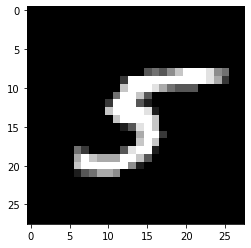

In [4]:
# Randomly check if dataset that I created are filled correctly
num = int(random.uniform(0,trainLow_samples))
plt.imshow(data_low_train[num], cmap="gray") # Import the image
print(label_low_train[num])
plt.show() # Plot the image

## **Pre process the data**

In [5]:
# Image dimensions
img_rows, img_cols = 28, 28

In [6]:
# Something I don't know
if K.image_data_format() == 'channels_first':
    data_low_train  = data_low_train.reshape(data_low_train.shape[0], 1, img_rows, img_cols)
    data_high_train = data_high_train.reshape(data_high_train.shape[0], 1, img_rows, img_cols)
    data_low_test   = data_low_test.reshape(data_low_test.shape[0], 1, img_rows, img_cols)
    data_high_test  = data_high_test.reshape(data_high_test.shape[0], 1, img_rows, img_cols)
    input_shape     = (1, img_rows, img_cols)
else:
    data_low_train  = data_low_train.reshape(data_low_train.shape[0], img_rows, img_cols, 1)
    data_high_train = data_high_train.reshape(data_high_train.shape[0], img_rows, img_cols, 1)
    data_low_test   = data_low_test.reshape(data_low_test.shape[0], img_rows, img_cols, 1)
    data_high_test  = data_high_test.reshape(data_high_test.shape[0], img_rows, img_cols, 1)
    input_shape     = (img_rows, img_cols, 1)

Normalize the dataset

In [7]:
data_low_train  = data_low_train.astype(np.float32) / 255.0
data_high_train = data_high_train.astype(np.float32) / 255.0
data_low_test   = data_low_test.astype(np.float32) / 255.0
data_high_test  = data_high_test.astype(np.float32) / 255.0

## **BUILD THE MODEL**

In [8]:
batch_size = 60
epochs     = 30
optimizer  = "adam"
loss       = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics    = ['accuracy']

In [9]:
# METHOD 1
# Define the model architecture
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(6, activation = "softmax"))

model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 8118      
Total params: 8,198
Trainable params: 8,198
Non-trainable params: 0
_________________________________________________________________


In [10]:
# METHOD 2
# This model is a bit larger and should be much more precise in the feature extraction
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = input_shape))
model2.add(Conv2D(32, (3, 3), activation = "relu"))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation = "relu"))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation = "softmax"))

model2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

## TRAIN THE MODEL

In [11]:
#model.fit(data_low_train, label_low_train, epochs = epochs, batch_size = batch_size, validation_split = 0.1)

# Evaluate the model performance
#test_loss, test_acc = model.evaluate(data_low_test, label_low_test)

#print('\nTest accuracy:', test_acc)   # Print out the model accuracy 

In [12]:
# convert to one hots
labels_prova = np.zeros((len(label_low_train), 6))
for i in range(0, len(label_low_train)):
    for j in range(0, 6):
        if(label_low_train[i]==j):
            labels_prova[i,j] = 1

In [13]:
labels_prova = keras.utils.to_categorical(label_low_train, 6)

In [14]:
model2.fit(
    data_low_train,
    labels_prova,
    epochs = epochs,
    batch_size = batch_size,
    validation_split = 0.1
)

Epoch 1/30
541/541 [==============================] - 25s 46ms/step - loss: 0.0949 - accuracy: 0.9694 - val_loss: 0.0288 - val_accuracy: 0.9925
Epoch 2/30
541/541 [==============================] - 31s 57ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0314 - val_accuracy: 0.9908
Epoch 3/30
541/541 [==============================] - 26s 48ms/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 0.0215 - val_accuracy: 0.9947
Epoch 4/30
541/541 [==============================] - 28s 53ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0340 - val_accuracy: 0.9919
Epoch 5/30
541/541 [==============================] - 26s 47ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0289 - val_accuracy: 0.9942
Epoch 6/30
541/541 [==============================] - 28s 53ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0223 - val_accuracy: 0.9953
Epoch 7/30
541/541 [==============================] - 27s 50ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.0423 - val_accuracy:

In [15]:
# Evaluate the model performance
test_loss, test_acc = model2.evaluate(data_low_test, keras.utils.to_categorical(label_low_test, 6))

print('\nTest accuracy:', test_acc)   # Print out the model accuracy 

189/189 [==============================] - 1s 4ms/step - loss: 0.0154 - accuracy: 0.9970

Test accuracy: 0.9970154166221619


## TEST THE MODEL

In [16]:
predictions = model2.predict(data_low_test)   # Make prediction of entire dataset

In [21]:
num = int(random.uniform(0,data_low_test.shape[0]))
print("Prediction = " , np.argmax(predictions[num]))
print("True label = " , label_low_test[num])

Prediction =  2
True label =  2.0


In [22]:
def plot_image(i, predictions_array, true_label, img):
    class_names = ['0','1','2','3','4','5']

    true_label, img = int(true_label[i]), img[i,:,:]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = (np.squeeze(img))## you have to delete the channel information (if grayscale) to plot the image
    plt.imshow(img, cmap="gray")

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)   


def plot_value_array(i, predictions_array, true_label):
    true_label = int(true_label[i])
    plt.grid(False)
    plt.xticks(range(6))
    plt.yticks([])
    thisplot = plt.bar(range(6), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

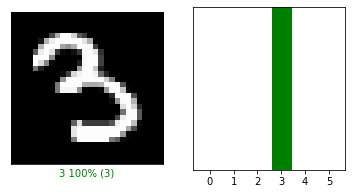

In [23]:
num = int(random.uniform(0, predictions.shape[0]))

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(num, predictions[num], label_low_test, data_low_test)
plt.subplot(1,2,2)

plot_value_array(num, predictions[num], label_low_test)
plt.show()

## **SAVE MODELS**

In [24]:
def save_summary_model(model, MODEL_PATH, flag):
    new_file = open(MODEL_PATH + 'model_summary.txt', "w")

    new_file.write("PARAMETERS SAVED FROM THE TRAINING")
    if(flag==0):
        new_file.write("\n\n This model has been trained for learning the first 6 digits from the MNIST dataset, this is the ORIGINAL MODEL")
    elif(flag==1):
        new_file.write("\n\n This model has been trained for learning the first 6 digits from the MNIST dataset, this is the FROZEN MODEL")
    new_file.write("\n")
    new_file.write("\n Batch size:       " + str(batch_size))
    new_file.write("\n Epochs:           " + str(epochs))
    new_file.write("\n Metrics:          " + str(metrics))
    new_file.write("\n Optimizer:        " + optimizer)
    new_file.write("\n Loss:             " + "SparseCategoricalCrossentropy \n\n")

    model.summary(print_fn=lambda x: new_file.write(x + '\n'))

In [25]:
ROOT_PATH = os.path.abspath('')
SAVE_MODEL_PATH = ROOT_PATH + "\\Saved_models\\"

ORIGINAL_MODEL_PATH = SAVE_MODEL_PATH + "\\Original_model\\"

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Save ORIGINAL MODEL as mnist_cnn.h5')
model.save(ORIGINAL_MODEL_PATH + "mnist_cnn.h5")
save_summary_model(model2, ORIGINAL_MODEL_PATH, 0)

Test loss: 0.01542341336607933
Test accuracy: 0.9970154166221619
Save ORIGINAL MODEL as mnist_cnn.h5


Now create the frozen model version for the one just saved. Which means just to cut away the last layer and save the model without the kast kayer. This should be instead saved in a txt/library file.

In [26]:
# CREATE AND SAVE THE FROZEN MODEL
frozen_model = keras.models.Sequential(model2.layers[:-1])
frozen_model.summary()
frozen_model.compile()

FROZEN_MODEL_PATH = SAVE_MODEL_PATH + "\\Frozen_model\\"

print('Save FROZEN MODEL model as mnist_cnn.h5')
frozen_model.save(FROZEN_MODEL_PATH + "mnist_cnn.h5")
save_summary_model(frozen_model, FROZEN_MODEL_PATH, 1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

Now save also the last layer weights in a txt file, this will later be used in the OpenMV camera for loading the weights that have been already trained. (ll = last layer)

In [27]:
ll_weights = np.array(model2.layers[-1].get_weights()[0])   # get last layer weights from TF model
ll_biases  = np.array(model2.layers[-1].get_weights()[1])   # get last layer biases from TF model
print(f'The shape of the last layer weights is: {ll_weights.shape}')
print(f'The shape of the last layer biases is: {ll_biases.shape}')


# -------- WEIGHTS
# NB: the filof weights is separated in smaller rows (338 float values on each row)
# thjis is done in order to make it easier for the OpenMV camera to load each line (memory problems)
with open(FROZEN_MODEL_PATH + 'll_weights.txt', 'w') as new_file:

    for j in range(0, ll_weights.shape[1]):
        for i in range(0, ll_weights.shape[0]): 
            if(i%338==0 and i!= 0 and i != ll_weights.shape[0]-1):
                new_file.write('\n')
                
            new_file.write(str(ll_weights[i,j]))
            
            if(i == ll_weights.shape[0]-1):
                new_file.write('\n')
            elif((i+1)%338 == 0):
                dummy = 0
            else:
                new_file.write(',')

new_file.close()


# -------- BIASES
with open(FROZEN_MODEL_PATH + 'll_biases.txt', 'w') as new_file:

    for i in range(0, ll_biases.shape[0]):     
        new_file.write(str(ll_biases[i])) 
        if(i!=ll_biases.shape[0]-1):
            new_file.write(',')
new_file.close()

The shape of the last layer weights is: (128, 6)
The shape of the last layer biases is: (6,)


## PRUNING

https://www.tensorflow.org/model_optimization/guide/pruning/pruning_with_keras

In [ ]:
# Uncomment this section if you want to load an already trained .h5 model
from tensorflow.keras.models import load_model

print("[INFO] loading CNN...")
#model = load_model("/content/drive/MyDrive/Embedded/Project/project-openmv/Results/squeezenet/ndat/3channels/squeezenet.h5")


In [ ]:
# Install needed optimization toolkit
! pip install -q tensorflow-model-optimization

In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after n epochs.
batch_size = BS
epochs = 20
validation_split = 0.1  # 10% of training set will be used for validation set. 

num_images = trainX.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.

# Select appropriate optimizer
if model_for_pruning.name == "squeezenet":
  sgd = tf.keras.optimizers.Adam(lr=0.0001)
  model_for_pruning.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
else:
  model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()




In [ ]:
import tempfile

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

if model_for_pruning.name == "squeezenet":
  model_for_pruning.fit(trainX, trainY,
                      batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                      callbacks=callbacks)
else:
  model.fit_generator(aug.flow(trainX, trainY, batch_size=BS), 
                      validation_data=(testX, testY),steps_per_epoch=len(trainX) // BS, epochs=epochs, verbose=1)


In [ ]:
# First, create a compressible model for TensorFlow

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
model_for_export.save(model_for_pruning.name + 'Exp.h5', include_optimizer=False)

# Both tfmot.sparsity.keras.strip_pruning and applying a standard compression algorithm (e.g. via gzip) are necessary to see the compression benefits of pruning.

In [ ]:
# Then, create a compressible model for TFLite

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

with open(model_for_export.name + 'Pruned.tflite', 'wb') as f:
  f.write(pruned_tflite_model)